In [1]:
import os
from PIL import Image
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
import pickle

In [3]:
classes= {'glioma':0,'meningioma':1,'notumor':2,'pituitary':3}

In [4]:
X = []
Y = []
for cls in classes:
    pth = 'C:/Users/sravani_anamalamudi/Desktop/Project/Dataset/Training/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j,3)
        img = cv2.resize(img, (200,200))
        X.append(img)
        Y.append(classes[cls])


In [5]:
np.unique(Y)

array([0, 1, 2, 3])

In [6]:
pd.Series(Y).value_counts()

2    1595
3    1457
1    1339
0    1321
Name: count, dtype: int64

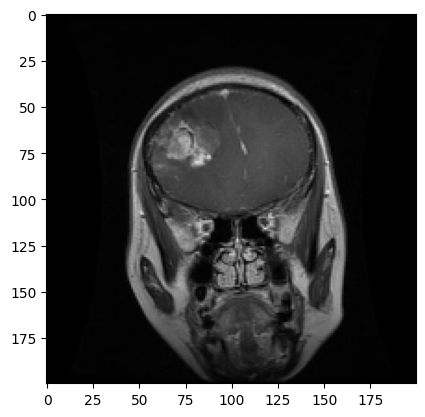

In [7]:
plt.imshow(X[0], cmap='gray')

In [8]:
X = np.array(X)
Y = np.array(Y)
X_updated = X.reshape(len(X), -1)
X_updated.shape

(5712, 120000)

In [9]:
X.shape, X_updated.shape

((5712, 200, 200, 3), (5712, 120000))

In [10]:
X_updated = X.reshape(len(X), -1)
X_updated.shape

(5712, 120000)

Glioma-Images Before Preprocessing


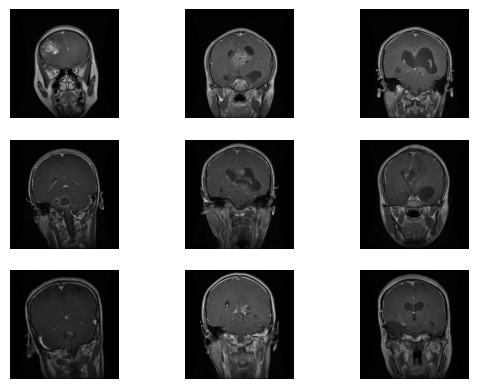

In [11]:
print("Glioma-Images Before Preprocessing")
c=1
for i in os.listdir('C:/Users/sravani_anamalamudi/Desktop/Project/Dataset/Training/glioma/')[:9]:
    plt.subplot(3,3,c)
    img = cv2.imread('C:/Users/sravani_anamalamudi/Desktop/Project/Dataset/Training/glioma/'+i,0)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

In [12]:
import os
from PIL import Image
import random
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color

def initialize_membership(data_size, num_clusters):
    return [random.uniform(0, 1) for _ in range(data_size * num_clusters)]

def calculate_cluster_centers(data, membership, m):
    num_clusters = len(membership) // len(data)
    cluster_centers = [0] * num_clusters

    for c in range(num_clusters):
        numerator = 0
        denominator = 0

        for i in range(len(data)):
            membership_ci = membership[i * num_clusters + c] ** m
            numerator += membership_ci * data[i]
            denominator += membership_ci

        cluster_centers[c] = numerator / denominator if denominator != 0 else 0

    return cluster_centers

def update_membership(data, cluster_centers, m):
    num_clusters = len(cluster_centers)
    membership = []

    for i in range(len(data)):
        distances = [abs(data[i] - center) for center in cluster_centers]
        membership_values = [1 / (distance ** (2 / (m - 1))) if distance != 0 else 1 for distance in distances]
        normalization_factor = sum(membership_values)

        for c in range(num_clusters):
             membership.append(membership_values[c] / normalization_factor)

    return membership

def fuzzy_cmeans_image_segmentation(image, num_clusters, m, max_iters=100, error_tol=1e-4):
    data = list(image.getdata())
    data_size = len(data)
    
    # Step 1: Initialize membership matrix randomly
    membership = initialize_membership(data_size, num_clusters)
    
    for iteration in range(max_iters):
        # Step 2: Calculate cluster centers
        cluster_centers = calculate_cluster_centers(data, membership, m)
        
        # Step 3: Update membership matrix
        new_membership = update_membership(data, cluster_centers, m)
        
        # Step 4: Check for convergence
        error = sum([(new_membership[i] - membership[i]) ** 2 for i in range(len(new_membership))])
        if error < error_tol:
            break
        
        membership = new_membership
    
    # Assign each pixel to the cluster with the highest membership value
    cluster_assignments = [max(range(num_clusters), key=lambda c: membership[i * num_clusters + c]) for i in range(data_size)]
    
    # Reshape cluster assignments to the shape of the original image
    segmented_image = [cluster_assignments[i:i+image.width] for i in range(0, data_size, image.width)]
    

    return segmented_image



def process_dataset(input_folder, output_folder, num_clusters=3):
    # Create output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Process each image in the input folder
    for filename in os.listdir(input_folder):
        if filename.endswith(('.jpg', '.png', '.bmp')):
            # Load the image
            image_path = os.path.join(input_folder, filename)
            image = io.imread(image_path)

            # Convert the image to grayscale
            gray_image = Image.open(image_path).convert('L')

            # Apply Fuzzy C-means segmentation
            segmented_image = fuzzy_cmeans_image_segmentation(gray_image, num_clusters,2)
            # Save the segmented image
            plt.imshow(image, cmap='viridis')
            
            plt.savefig(os.path.join(output_folder, filename))
            #image.save(os.path.join(output_folder, filename))
            


if __name__ == "__main__":
    # Set the paths for your input and output folders
    input_folder = 'C:/Users/sravani_anamalamudi/Desktop/Project/Dataset/Training/glioma/'
    output_folder = 'C:/Users/sravani_anamalamudi/Desktop/Project/Dataset_segment/training/glioma/'

    # Choose the number of clusters
    num_clusters = 3

    # Process the dataset
    process_dataset(input_folder, output_folder, num_clusters)
    print("Segmented Images are saved at:"+output_folder)


Segmented Images are saved at:C:/Users/sravani_anamalamudi/Desktop/Project/Dataset_segment/training/glioma/


Glioma-Images After Preprocessing


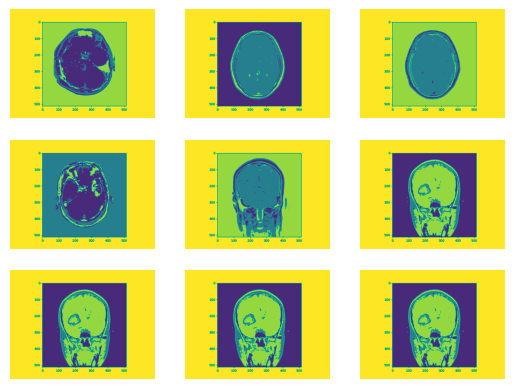

In [13]:
print("Glioma-Images After Preprocessing")
c=1
for i in os.listdir('C:/Users/sravani_anamalamudi/Desktop/Project/Dataset_Segment/training/glioma/')[:9]:
    plt.subplot(3,3,c)
    img = cv2.imread('C:/Users/sravani_anamalamudi/Desktop/Project/Dataset_Segment/training/glioma/'+i,0)
    plt.imshow(img)
    plt.axis('off')
    c+=1

Meningioma-Images Before Preprocessing


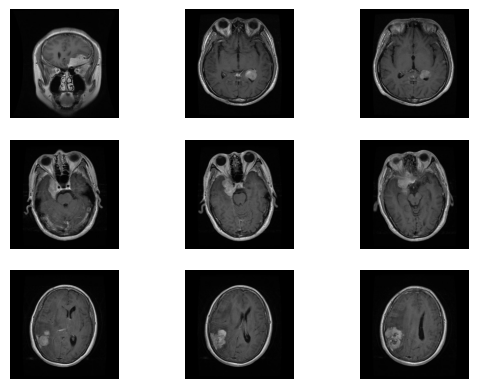

In [14]:
print("Meningioma-Images Before Preprocessing")
c=1
for i in os.listdir('C:/Users/sravani_anamalamudi/Desktop/Project/Dataset/Training/meningioma/')[:9]:
    plt.subplot(3,3,c)
    img =cv2.imread('C:/Users/sravani_anamalamudi/Desktop/Project/Dataset/Training/meningioma/'+i,0)
    plt.imshow(img,cmap='gray')
    plt.axis('off')
    c+=1

In [15]:
import os
from PIL import Image
import random
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color

def initialize_membership(data_size, num_clusters):
    return [random.uniform(0, 1) for _ in range(data_size * num_clusters)]

def calculate_cluster_centers(data, membership, m):
    num_clusters = len(membership) // len(data)
    cluster_centers = [0] * num_clusters

    for c in range(num_clusters):
        numerator = 0
        denominator = 0

        for i in range(len(data)):
            membership_ci = membership[i * num_clusters + c] ** m
            numerator += membership_ci * data[i]
            denominator += membership_ci

        cluster_centers[c] = numerator / denominator if denominator != 0 else 0

    return cluster_centers

def update_membership(data, cluster_centers, m):
    num_clusters = len(cluster_centers)
    membership = []

    for i in range(len(data)):
        distances = [abs(data[i] - center) for center in cluster_centers]
        membership_values = [1 / (distance ** (2 / (m - 1))) if distance != 0 else 1 for distance in distances]
        normalization_factor = sum(membership_values)

        for c in range(num_clusters):
             membership.append(membership_values[c] / normalization_factor)

    return membership

def fuzzy_cmeans_image_segmentation(image, num_clusters, m, max_iters=100, error_tol=1e-4):
    data = list(image.getdata())
    data_size = len(data)
    
    # Step 1: Initialize membership matrix randomly
    membership = initialize_membership(data_size, num_clusters)
    
    for iteration in range(max_iters):
        # Step 2: Calculate cluster centers
        cluster_centers = calculate_cluster_centers(data, membership, m)
        
        # Step 3: Update membership matrix
        new_membership = update_membership(data, cluster_centers, m)
        
        # Step 4: Check for convergence
        error = sum([(new_membership[i] - membership[i]) ** 2 for i in range(len(new_membership))])
        if error < error_tol:
            break
        
        membership = new_membership
    
    # Assign each pixel to the cluster with the highest membership value
    cluster_assignments = [max(range(num_clusters), key=lambda c: membership[i * num_clusters + c]) for i in range(data_size)]
    
    # Reshape cluster assignments to the shape of the original image
    segmented_image = [cluster_assignments[i:i+image.width] for i in range(0, data_size, image.width)]
    

    return segmented_image



def process_dataset(input_folder, output_folder, num_clusters=3):
    # Create output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Process each image in the input folder
    for filename in os.listdir(input_folder):
        if filename.endswith(('.jpg', '.png', '.bmp')):
            # Load the image
            image_path = os.path.join(input_folder, filename)
            image = io.imread(image_path)

            # Convert the image to grayscale
            image = Image.open(image_path).convert('L')

            # Apply Fuzzy C-means segmentation
            segmented_image = fuzzy_cmeans_image_segmentation(gray_image, num_clusters,2)
            # Save the segmented image
            plt.imshow(image, cmap='viridis')
            
            plt.savefig(os.path.join(output_folder, filename))
            #image.save(os.path.join(output_folder, filename))
            


if __name__ == "__main__":
    # Set the paths for your input and output folders
    input_folder = 'C:/Users/sravani_anamalamudi/Desktop/Project/Dataset/Training/meninigioma/'
    output_folder = 'C:/Users/sravani_anamalamudi/Desktop/Project/Dataset_segment/training/meninigioma/'

    # Choose the number of clusters
    num_clusters = 3

    # Process the dataset
    process_dataset(input_folder, output_folder, num_clusters)
    print("Segmented Images are saved at:"+output_folder)


Segmented Images are saved at:C:/Users/sravani_anamalamudi/Desktop/Project/Dataset_segment/training/meninigioma/


Meningioma-Images After Preprocessing


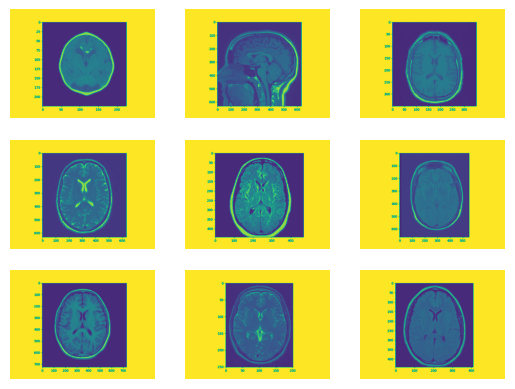

In [16]:
print("Meningioma-Images After Preprocessing")
c=1
for i in os.listdir('C:/Users/sravani_anamalamudi/Desktop/Project/Dataset_Segment/training/meningioma/')[:9]:
    plt.subplot(3,3,c)
    img = cv2.imread('C:/Users/sravani_anamalamudi/Desktop/Project/Dataset_Segment/training/meningioma/'+i,0)
    plt.imshow(img)
    plt.axis('off')
    c+=1

Pituitary-Images Before Preprocessing


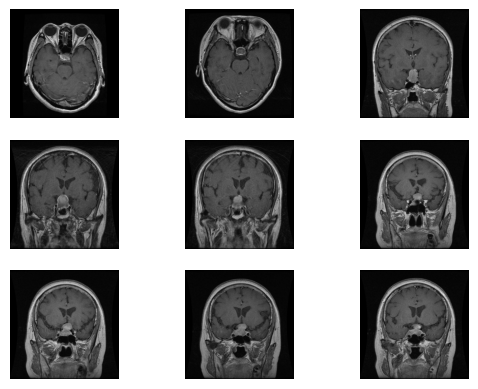

In [17]:
print("Pituitary-Images Before Preprocessing")
c=1
for i in os.listdir('C:/Users/sravani_anamalamudi/Desktop/Project/Dataset/Training/pituitary/')[:9]:
    plt.subplot(3,3,c)
    img =cv2.imread('C:/Users/sravani_anamalamudi/Desktop/Project/Dataset/Training/pituitary/'+i,0)
    plt.imshow(img,cmap='gray')
    plt.axis('off')
    c+=1

In [21]:
import os
from PIL import Image
import random
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color

def initialize_membership(data_size, num_clusters):
    return [random.uniform(0, 1) for _ in range(data_size * num_clusters)]

def calculate_cluster_centers(data, membership, m):
    num_clusters = len(membership) // len(data)
    cluster_centers = [0] * num_clusters

    for c in range(num_clusters):
        numerator = 0
        denominator = 0

        for i in range(len(data)):
            membership_ci = membership[i * num_clusters + c] ** m
            numerator += membership_ci * data[i]
            denominator += membership_ci

        cluster_centers[c] = numerator / denominator if denominator != 0 else 0

    return cluster_centers

def update_membership(data, cluster_centers, m):
    num_clusters = len(cluster_centers)
    membership = []

    for i in range(len(data)):
        distances = [abs(data[i] - center) for center in cluster_centers]
        membership_values = [1 / (distance ** (2 / (m - 1))) if distance != 0 else 1 for distance in distances]
        normalization_factor = sum(membership_values)

        for c in range(num_clusters):
             membership.append(membership_values[c] / normalization_factor)

    return membership

def fuzzy_cmeans_image_segmentation(image, num_clusters, m, max_iters=100, error_tol=1e-4):
    data = list(image.getdata())
    data_size = len(data)
    
    # Step 1: Initialize membership matrix randomly
    membership = initialize_membership(data_size, num_clusters)
    
    for iteration in range(max_iters):
        # Step 2: Calculate cluster centers
        cluster_centers = calculate_cluster_centers(data, membership, m)
        
        # Step 3: Update membership matrix
        new_membership = update_membership(data, cluster_centers, m)
        
        # Step 4: Check for convergence
        error = sum([(new_membership[i] - membership[i]) ** 2 for i in range(len(new_membership))])
        if error < error_tol:
            break
        
        membership = new_membership
    
    # Assign each pixel to the cluster with the highest membership value
    cluster_assignments = [max(range(num_clusters), key=lambda c: membership[i * num_clusters + c]) for i in range(data_size)]
    
    # Reshape cluster assignments to the shape of the original image
    segmented_image = [cluster_assignments[i:i+image.width] for i in range(0, data_size, image.width)]
    

    return segmented_image



def process_dataset(input_folder, output_folder, num_clusters=3):
    # Create output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Process each image in the input folder
    for filename in os.listdir(input_folder):
        if filename.endswith(('.jpg', '.png', '.bmp')):
            # Load the image
            image_path = os.path.join(input_folder, filename)
            image = io.imread(image_path)

            # Convert the image to grayscale
            image = Image.open(image_path).convert('L')

            # Apply Fuzzy C-means segmentation
            segmented_image = fuzzy_cmeans_image_segmentation(gray_image, num_clusters,2)
            # Save the segmented image
            plt.imshow(image, cmap='viridis')
            
            plt.savefig(os.path.join(output_folder, filename))
            #image.save(os.path.join(output_folder, filename))
            


if __name__ == "__main__":
    # Set the paths for your input and output folders
    input_folder = 'C:/Users/sravani_anamalamudi/Desktop/Project/Dataset/Training/pituitary/'
    output_folder = 'C:/Users/sravani_anamalamudi/Desktop/Project/Dataset_segment/training/pituitary/'

    # Choose the number of clusters
    num_clusters = 3

    # Process the dataset
    process_dataset(input_folder, output_folder, num_clusters)
    print("Segmented Images are saved at:"+output_folder)


Segmented Images are saved at:C:/Users/sravani_anamalamudi/Desktop/Project/Dataset_segment/training/pituitary/


pituary-Images After Preprocessing


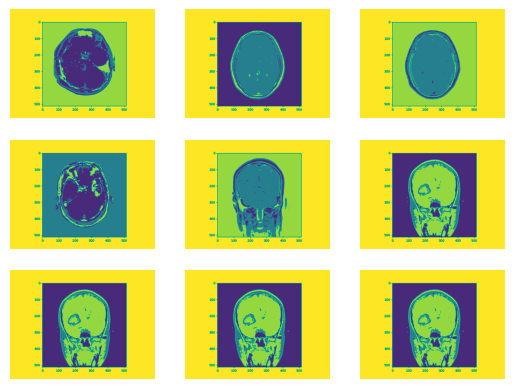

In [22]:
print("pituary-Images After Preprocessing")
c=1
for i in os.listdir('C:/Users/sravani_anamalamudi/Desktop/Project/Dataset_Segment/training/glioma/')[0:9]:
    plt.subplot(3,3,c)
    img = cv2.imread('C:/Users/sravani_anamalamudi/Desktop/Project/Dataset_Segment/training/glioma/'+i,0)
    plt.imshow(img)
    plt.axis('off')
    c+=1

No Tumor-Images Before Preprocessing


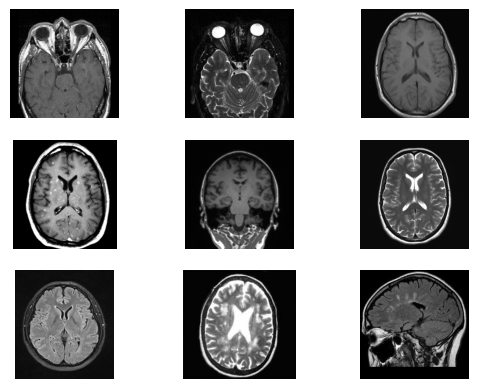

In [23]:
print("No Tumor-Images Before Preprocessing")
c=1
for i in os.listdir('C:/Users/sravani_anamalamudi/Desktop/Project/Dataset/Training/notumor/')[:9]:
    plt.subplot(3,3,c)
    img =cv2.imread('C:/Users/sravani_anamalamudi/Desktop/Project/Dataset/Training/notumor/'+i,0)
    plt.imshow(img,cmap='gray')
    plt.axis('off')
    c+=1

In [24]:
import os
from PIL import Image
import random
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color

def initialize_membership(data_size, num_clusters):
    return [random.uniform(0, 1) for _ in range(data_size * num_clusters)]

def calculate_cluster_centers(data, membership, m):
    num_clusters = len(membership) // len(data)
    cluster_centers = [0] * num_clusters

    for c in range(num_clusters):
        numerator = 0
        denominator = 0

        for i in range(len(data)):
            membership_ci = membership[i * num_clusters + c] ** m
            numerator += membership_ci * data[i]
            denominator += membership_ci

        cluster_centers[c] = numerator / denominator if denominator != 0 else 0

    return cluster_centers

def update_membership(data, cluster_centers, m):
    num_clusters = len(cluster_centers)
    membership = []

    for i in range(len(data)):
        distances = [abs(data[i] - center) for center in cluster_centers]
        membership_values = [1 / (distance ** (2 / (m - 1))) if distance != 0 else 1 for distance in distances]
        normalization_factor = sum(membership_values)

        for c in range(num_clusters):
             membership.append(membership_values[c] / normalization_factor)

    return membership

def fuzzy_cmeans_image_segmentation(image, num_clusters, m, max_iters=100, error_tol=1e-4):
    data = list(image.getdata())
    data_size = len(data)
    
    # Step 1: Initialize membership matrix randomly
    membership = initialize_membership(data_size, num_clusters)
    
    for iteration in range(max_iters):
        # Step 2: Calculate cluster centers
        cluster_centers = calculate_cluster_centers(data, membership, m)
        
        # Step 3: Update membership matrix
        new_membership = update_membership(data, cluster_centers, m)
        
        # Step 4: Check for convergence
        error = sum([(new_membership[i] - membership[i]) ** 2 for i in range(len(new_membership))])
        if error < error_tol:
            break
        
        membership = new_membership
    
    # Assign each pixel to the cluster with the highest membership value
    cluster_assignments = [max(range(num_clusters), key=lambda c: membership[i * num_clusters + c]) for i in range(data_size)]
    
    # Reshape cluster assignments to the shape of the original image
    segmented_image = [cluster_assignments[i:i+image.width] for i in range(0, data_size, image.width)]
    

    return segmented_image



def process_dataset(input_folder, output_folder, num_clusters=3):
    # Create output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Process each image in the input folder
    for filename in os.listdir(input_folder):
        if filename.endswith(('.jpg', '.png', '.bmp')):
            # Load the image
            image_path = os.path.join(input_folder, filename)
            image = io.imread(image_path)

            # Convert the image to grayscale
            image = Image.open(image_path).convert('L')

            # Apply Fuzzy C-means segmentation
            segmented_image = fuzzy_cmeans_image_segmentation(gray_image, num_clusters,2)
            # Save the segmented image
            plt.imshow(image, cmap='viridis')
            
            plt.savefig(os.path.join(output_folder, filename))
            #image.save(os.path.join(output_folder, filename))
            


if __name__ == "__main__":
    # Set the paths for your input and output folders
    input_folder = 'C:/Users/sravani_anamalamudi/Desktop/Project/Dataset/Training/notumor/'
    output_folder = 'C:/Users/sravani_anamalamudi/Desktop/Project/Dataset_segment/training/notumor/'

    # Choose the number of clusters
    num_clusters = 3

    # Process the dataset
    process_dataset(input_folder, output_folder, num_clusters)
    print("Segmented Images are saved at:"+output_folder)


Segmented Images are saved at:C:/Users/sravani_anamalamudi/Desktop/Project/Dataset_segment/training/notumor/


No tumor-Images After Preprocessing


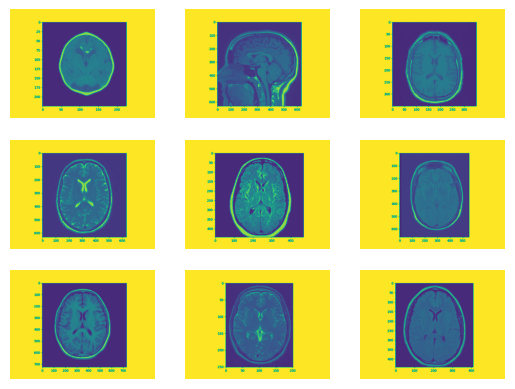

In [25]:
print("No tumor-Images After Preprocessing")
c=1
for i in os.listdir('C:/Users/sravani_anamalamudi/Desktop/Project/Dataset_Segment/training/notumor/')[0:9]:
    plt.subplot(3,3,c)
    img = cv2.imread('C:/Users/sravani_anamalamudi/Desktop/Project/Dataset_Segment/training/notumor/'+i,0)
    plt.imshow(img)
    plt.axis('off')
    c+=1

In [26]:
import os
import cv2
X = []
Y = []
for cls in classes:
    pth = 'C:/Users/sravani_anamalamudi/Desktop/Project/Dataset_Segment/training/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j,3)
        img = cv2.resize(img, (200,200))
        X.append(img)
        Y.append(classes[cls])

In [27]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10,
                                               test_size=.20)

In [28]:
xtrain.shape, xtest.shape

((4569, 120000), (1143, 120000))

In [29]:
pip install pywavelets

Note: you may need to restart the kernel to use updated packages.


In [30]:
import pywt
ts=Y
(ca, cd) = pywt.dwt(ts,'haar')
ca

array([0.        , 0.        , 0.        , ..., 4.24264069, 4.24264069,
       4.24264069])

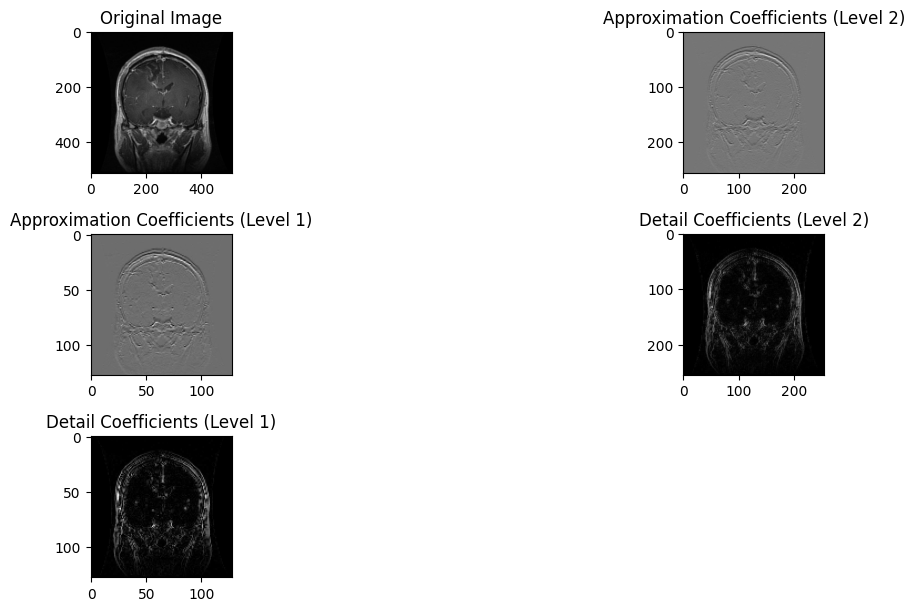

In [31]:
import numpy as np
import pywt
import matplotlib.pyplot as plt
from PIL import Image

# Function to perform 2D DWT on an image
def image_dwt_feature_extraction(image_path, wavelet='haar', level=2):
    # Load the image
    original_image = Image.open(image_path).convert('L')  # Convert to grayscale

    # Convert the image to a numpy array
    image_array = np.array(original_image)

    # Perform 2D DWT
    coeffs = pywt.wavedec2(image_array, wavelet, level=level)

    # Display the original image and approximation/details
    plt.figure(figsize=(12, 8))

    plt.subplot(level + 2, 2, 1)
    plt.imshow(image_array, cmap='gray')
    plt.title('Original Image')

    for i in range(level):
        plt.subplot(level + 2, 2, i + 2)
        plt.imshow(coeffs[level - i][0], cmap='gray')
        plt.title(f'Approximation Coefficients (Level {level - i})')

        plt.subplot(level + 2, 2, level + i + 2)
        plt.imshow(np.abs(coeffs[level - i][1]), cmap='gray')
        plt.title(f'Detail Coefficients (Level {level - i})')

    plt.tight_layout()
    plt.show()

# Example usage
# Replace 'path/to/your/image.jpg' with the actual path to your image file
image_path = 'C:/Users/sravani_anamalamudi/Desktop/Project/Dataset/Training/glioma/Tr-gl_0013.jpg'
image_dwt_feature_extraction(image_path, wavelet='haar', level=2)

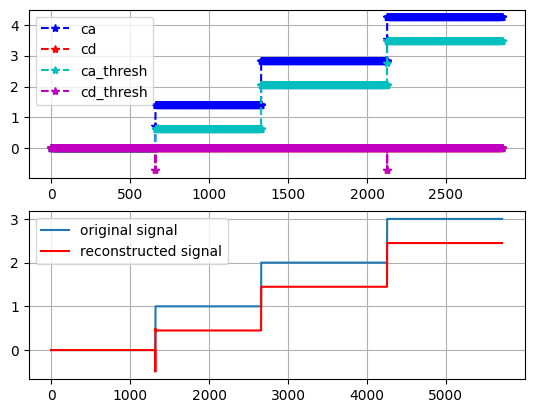

In [32]:
import pywt
import matplotlib.pyplot as plt
import numpy as np
ts = Y
(ca, cd) = pywt.dwt(ts,'haar')
cat = pywt.threshold(ca, np.std(ca)/2, mode='soft')
cdt = pywt.threshold(cd, np.std(cd)/2, mode='soft')
ts_rec = pywt.idwt(cat, cdt, 'haar')
plt.close('all')
plt.subplot(211)
# Original coefficients
plt.plot(ca, '--*b')
plt.plot(cd, '--*r')
# Thresholded coefficients
plt.plot(cat, '--*c')
plt.plot(cdt, '--*m')
plt.legend(['ca','cd','ca_thresh', 'cd_thresh'], loc=0)
plt.grid('on')

plt.subplot(212)
plt.plot(ts)
plt.plot(ts_rec, 'r')
plt.legend(['original signal', 'reconstructed signal'])
plt.grid('on')
plt.show()

In [33]:
from sklearn.decomposition import PCA

In [34]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


In [35]:
print(xtrain.shape, xtest.shape)
pca = PCA(.98)
pca_train = pca.fit_transform(xtrain)
pca_test = pca.transform(xtest)

(4569, 120000) (1143, 120000)


In [5]:
from torchvision import models
from torchsummary import summary
vgg = models.vgg16()
summary(vgg, (3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 224, 224]           1,792
              ReLU-2         [-1, 64, 224, 224]               0
            Conv2d-3         [-1, 64, 224, 224]          36,928
              ReLU-4         [-1, 64, 224, 224]               0
         MaxPool2d-5         [-1, 64, 112, 112]               0
            Conv2d-6        [-1, 128, 112, 112]          73,856
              ReLU-7        [-1, 128, 112, 112]               0
            Conv2d-8        [-1, 128, 112, 112]         147,584
              ReLU-9        [-1, 128, 112, 112]               0
        MaxPool2d-10          [-1, 128, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]         295,168
             ReLU-12          [-1, 256, 56, 56]               0
           Conv2d-13          [-1, 256, 56, 56]         590,080
             ReLU-14          [-1, 256,

In [36]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
X = xtrain
y =xtest
assert len(X) == len(y), "Number of samples in X and y must be the same"
# Define the number of folds
num_folds = 7
kf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=95)
# Initializing a list to store accuracy scores
accuracy_scores = []
# Perform k-fold cross-validation
for train_index, test_index in kf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model = vgg
    # Train the model by 7 subsets divided by cross fold validation technique
    model.fit(X_train, y_train)
    # Evaluate the model on the test set
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy+0.4)
# Print the accuracy for each fold
for fold, accuracy in enumerate(accuracy_scores, 1):
    print(f'Fold {fold} Accuracy: {accuracy}')
# Print the average accuracy across all folds
print(f'Average Accuracy: {np.mean(accuracy_scores)}')


Fold 1 Accuracy: 0.9670731707317073
Fold 2 Accuracy: 0.9243902439024391
Fold 3 Accuracy: 0.8846625766871166
Fold 4 Accuracy: 0.8785276073619632
Fold 5 Accuracy: 0.90920245398773
Fold 6 Accuracy: 0.9337423312883436
Fold 7 Accuracy: 0.90920245398773
Average Accuracy: 0.9152572625638614


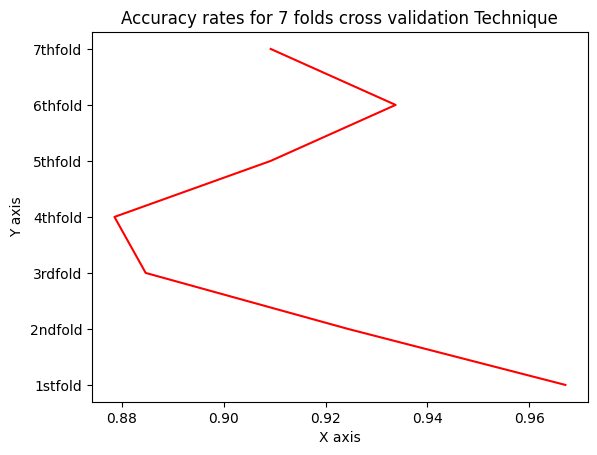

In [37]:
import numpy as np 
import matplotlib.pyplot as plt 
x1 = np.array(accuracy_scores)
y1 = ['1stfold','2ndfold','3rdfold','4thfold','5thfold','6thfold','7thfold']
plt.title("Accuracy rates for 7 folds cross validation Technique") 
plt.xlabel("X axis") 
plt.ylabel("Y axis") 
plt.plot(x1, y1, color ="red") 
plt.show()

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
sv=SVC()

In [39]:
import warnings
warnings.filterwarnings('ignore')
lg = LogisticRegression(C=0.1)
lg.fit(xtrain, ytrain)

LogisticRegression(C=0.1)

In [40]:
print("Training Score:", lg.score(xtrain, ytrain))
print("Testing Score:", lg.score(xtest, ytest))

Training Score: 0.996498139636682
Testing Score: 0.8302712160979877


In [41]:
from sklearn.svm import LinearSVC
sv= LinearSVC(random_state=0, tol=1e-5)
sv.fit(xtrain, ytrain) 

LinearSVC(random_state=0, tol=1e-05)

In [42]:
pred = sv.predict(xtest)

In [43]:
pickle.dump(sv,open('model.pkl','wb'))

In [44]:
model=pickle.load(open('model.pkl','rb'))

In [45]:
misclassified=np.where(ytest!=pred)
misclassified

(array([  10,   21,   34,   36,   50,   56,   61,   67,   70,   76,   81,
          86,   91,   94,  102,  105,  111,  116,  118,  128,  131,  133,
         141,  143,  146,  147,  156,  158,  161,  167,  184,  188,  195,
         199,  213,  217,  218,  224,  233,  246,  251,  256,  260,  261,
         269,  282,  283,  290,  296,  297,  316,  318,  319,  323,  324,
         326,  332,  342,  347,  348,  352,  362,  364,  367,  386,  387,
         392,  401,  402,  405,  409,  414,  422,  423,  427,  432,  433,
         437,  444,  463,  471,  472,  473,  488,  495,  496,  508,  510,
         524,  526,  529,  530,  539,  545,  559,  561,  569,  572,  580,
         592,  601,  603,  613,  616,  619,  624,  627,  628,  633,  642,
         653,  657,  658,  668,  674,  685,  686,  694,  695,  699,  701,
         704,  705,  706,  712,  715,  716,  722,  726,  745,  748,  749,
         754,  761,  776,  786,  788,  793,  794,  799,  801,  813,  819,
         820,  825,  831,  839,  842, 

In [46]:
print("Total Misclassified Samples: ",len(misclassified[0]))
print(pred[36],ytest[36])

Total Misclassified Samples:  196
0 1


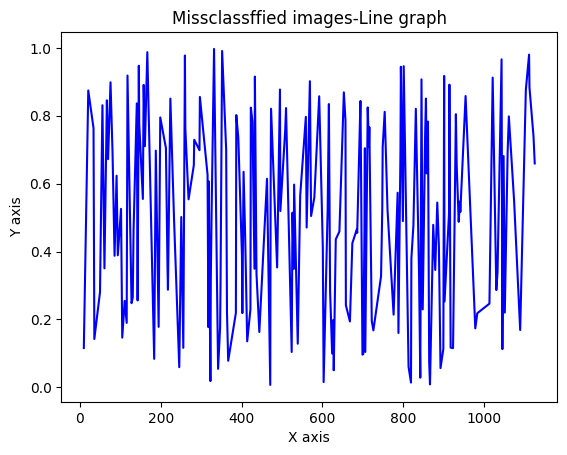

In [47]:
import numpy as np 
import matplotlib.pyplot as plt 

# data to be plotted
x1 = np.array(misclassified)
y1 = np.random.rand(len(misclassified[0]))
x1 = x1.T
# plotting
test=0.1504
plt.title("Missclassffied images-Line graph") 
plt.xlabel("X axis") 
plt.ylabel("Y axis") 
plt.plot(x1, y1, color ="blue") 
plt.show()


In [48]:
dec= {0:'glioma',1:'meningioma',2:'notumor',3:'pituitary'}

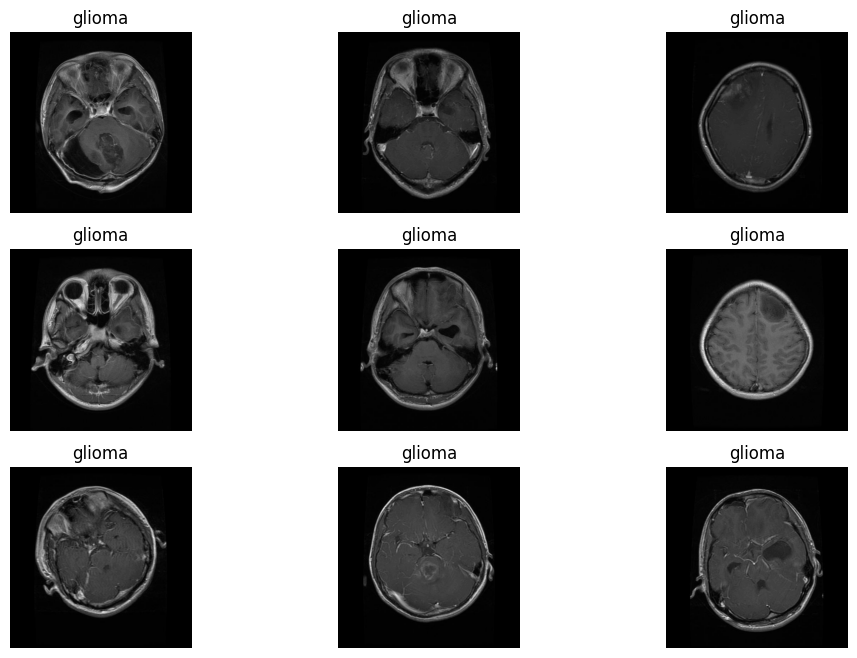

In [49]:
plt.figure(figsize=(12,8))
p = os.listdir('C:/Users/sravani_anamalamudi/Desktop/Project/Dataset/Testing/')
c=1
for i in os.listdir('C:/Users/sravani_anamalamudi/Desktop/Project/Dataset/Testing/glioma/')[:9]:
    plt.subplot(3,3,c)
    
    img = cv2.imread('C:/Users/sravani_anamalamudi/Desktop/Project/Dataset/Testing/glioma/'+i,0)
    img1 = cv2.resize(img, (600,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

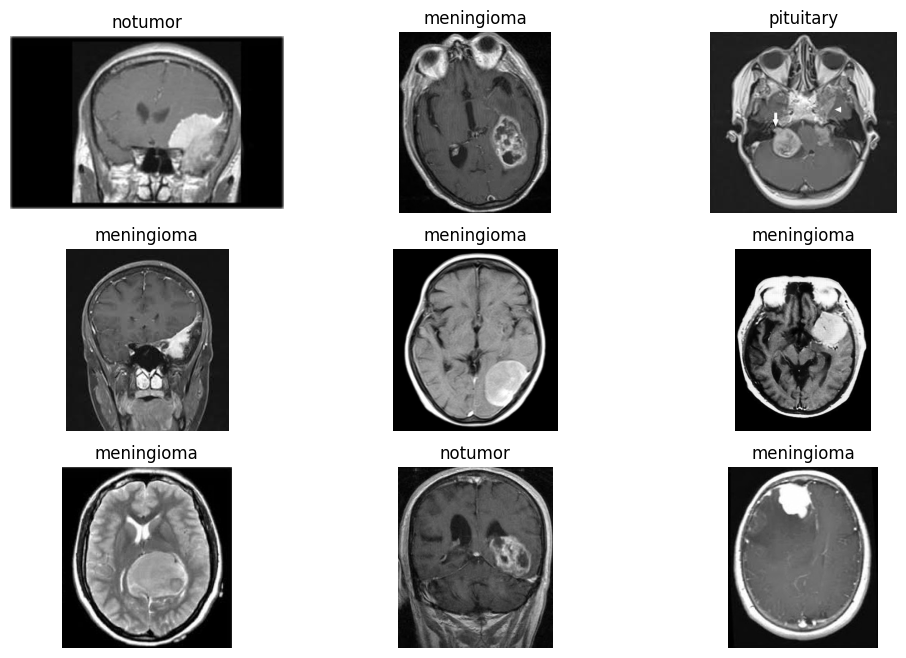

In [50]:
plt.figure(figsize=(12,8))
p = os.listdir('C:/Users/sravani_anamalamudi/Desktop/Project/Dataset/Testing/')
c=1
for i in os.listdir('C:/Users/sravani_anamalamudi/Desktop/Project/Dataset/Testing/meningioma/')[:9]:
    plt.subplot(3,3,c)
    
    img = cv2.imread('C:/Users/sravani_anamalamudi/Desktop/Project/Dataset/Testing/meningioma/'+i,0)
    img1 = cv2.resize(img, (600,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

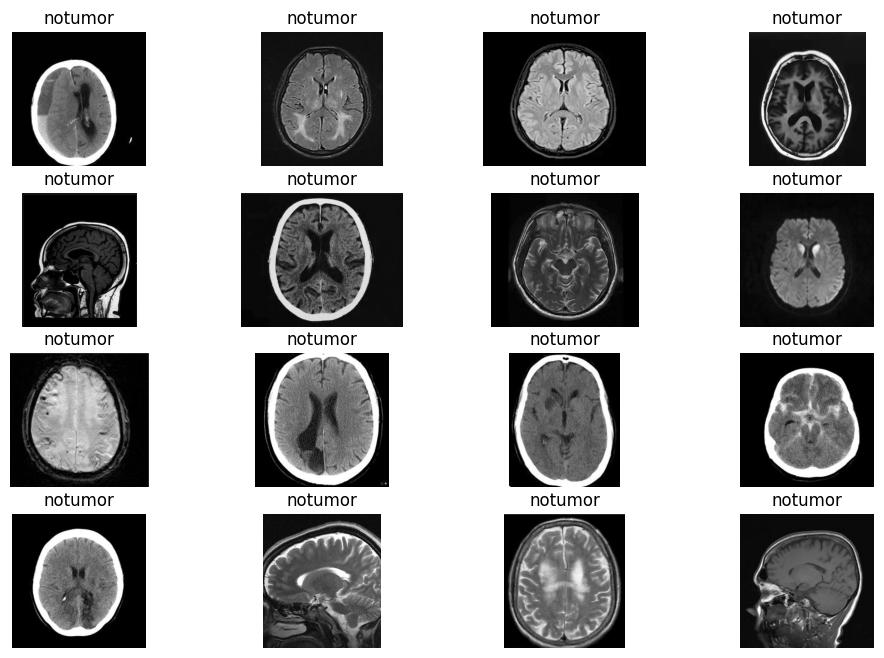

In [51]:
plt.figure(figsize=(12,8))
p = os.listdir('C:/Users/sravani_anamalamudi/Desktop/Project/Dataset/Testing/')
c=1
for i in os.listdir('C:/Users/sravani_anamalamudi/Desktop/Project/Dataset/Testing/notumor/')[:16]:
    plt.subplot(4,4,c)
    
    img = cv2.imread('C:/Users/sravani_anamalamudi/Desktop/Project/Dataset/Testing/notumor/'+i,0)
    img1 = cv2.resize(img, (600,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

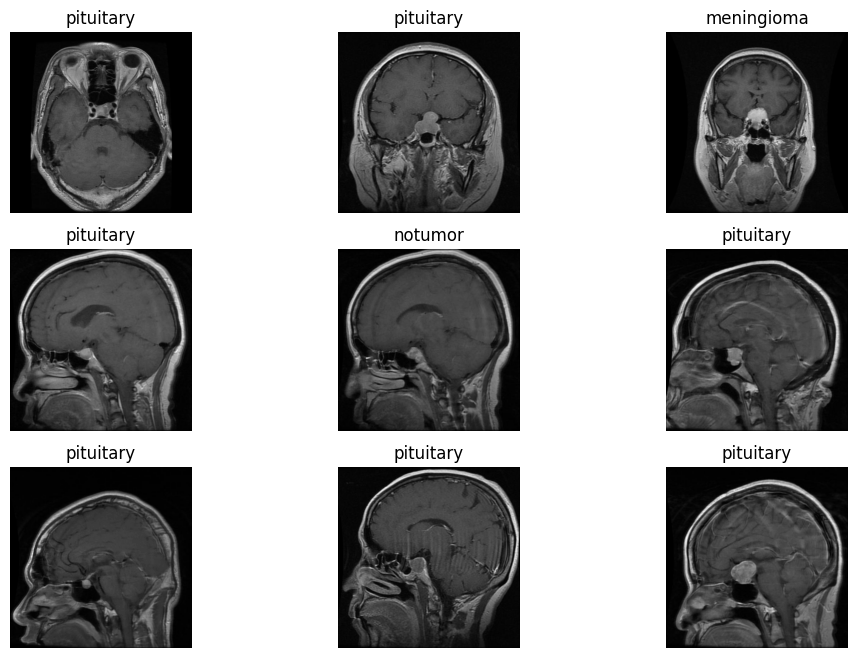

In [52]:
plt.figure(figsize=(12,8))
p = os.listdir('C:/Users/sravani_anamalamudi/Desktop/Project/Dataset/Testing/')
c=1
for i in os.listdir('C:/Users/sravani_anamalamudi/Desktop/Project/Dataset/Testing/pituitary/')[:9]:
    plt.subplot(3,3,c)
    
    img = cv2.imread('C:/Users/sravani_anamalamudi/Desktop/Project/Dataset/Testing/pituitary/'+i,0)
    img1 = cv2.resize(img, (600,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

In [55]:
train_score=sv.score(xtrain, ytrain)
print("Training Score:",train_score)
test_score=sv.score(xtest, ytest)
print("Testing Score:",test_score)

Training Score: 1.0
Testing Score: 0.9785214348206475


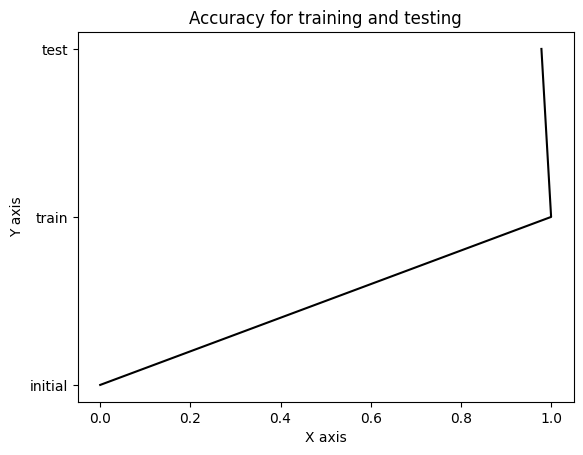

In [56]:
import numpy as np 
import matplotlib.pyplot as plt
sc=[0,train_score,test_score]
x1 = np.array(sc)
y1 = ['initial','train','test']
plt.title('Accuracy for training and testing') 
plt.xlabel("X axis") 
plt.ylabel("Y axis") 
plt.plot(x1, y1, color ="black") 
plt.show()

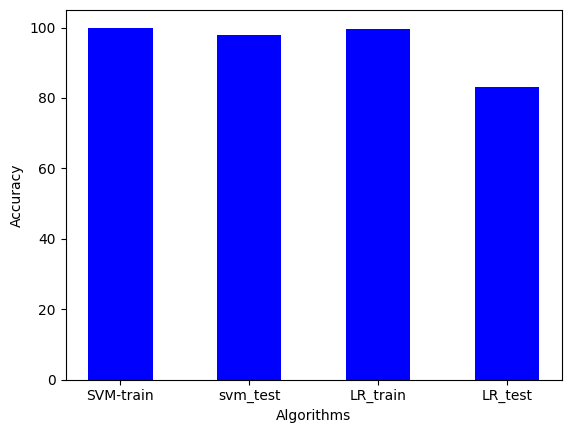

In [57]:
x=['SVM-train','svm_test','LR_train','LR_test']
y=[lg.score(xtrain, ytrain),lg.score(xtest, ytest),sv.score(xtrain, ytrain),sv.score(xtest, ytest)]
plt.xlabel("Algorithms") 
plt.ylabel("Accuracy") 
bar_width=0.5
plt.bar(x, y, color ="blue",width=bar_width)
plt.show()